# Chapter 3: Structural Optimization

---

**Prerequisites:**
- Python 3.8+
- Qiskit 2.1.2
- See `Chapter02_Software.ipynb` for installation instructions


In [1]:
# Setup and imports for D-Wave
import numpy as np
import matplotlib.pyplot as plt

from Chapter03_StructuralOptimization_functions import (truss1x1,truss1x2,truss2x2,TopOptOC,
                                                         PlaneStressCantilever, PlaneStressMBBBeam)

print('Setup complete!')

Setup complete!


## Pick a truss example

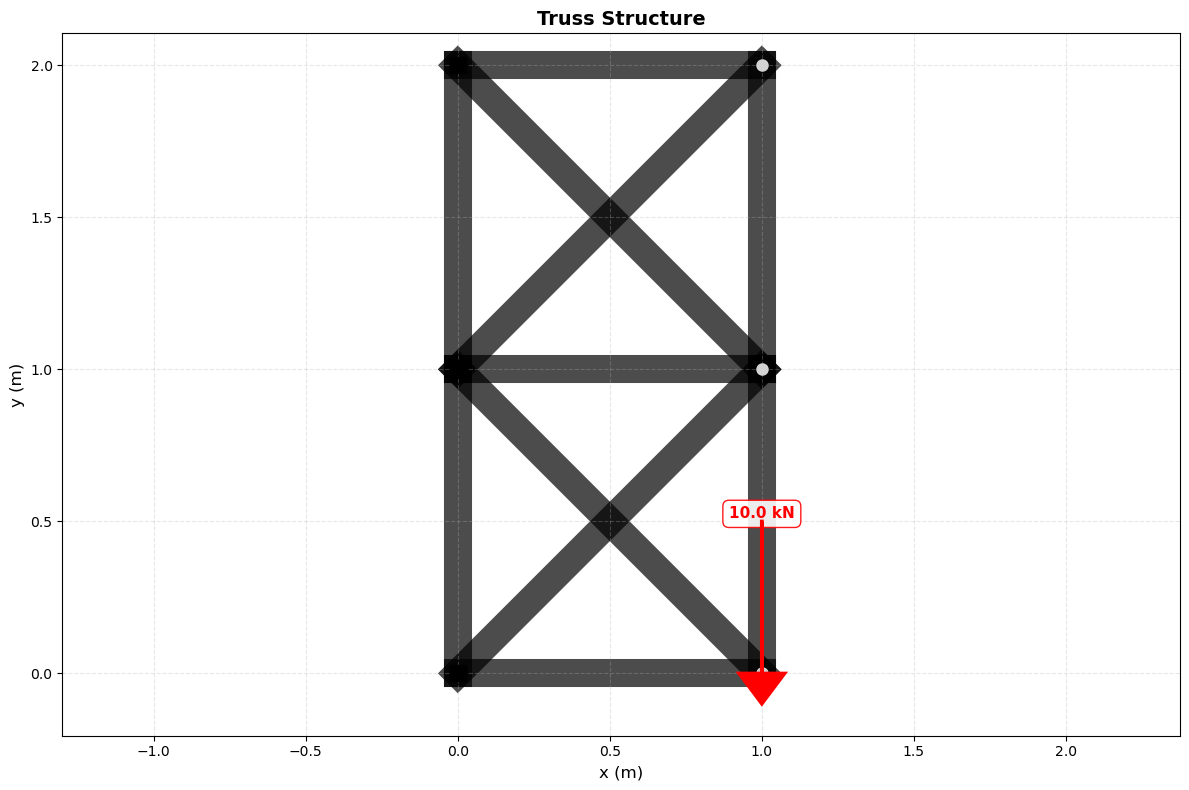

In [2]:
fem_model= truss1x2() 
fem_model.plot_truss()

## Solving and plotting deformed truss

Design valid? True
Max displacement: 1.354e-07 m


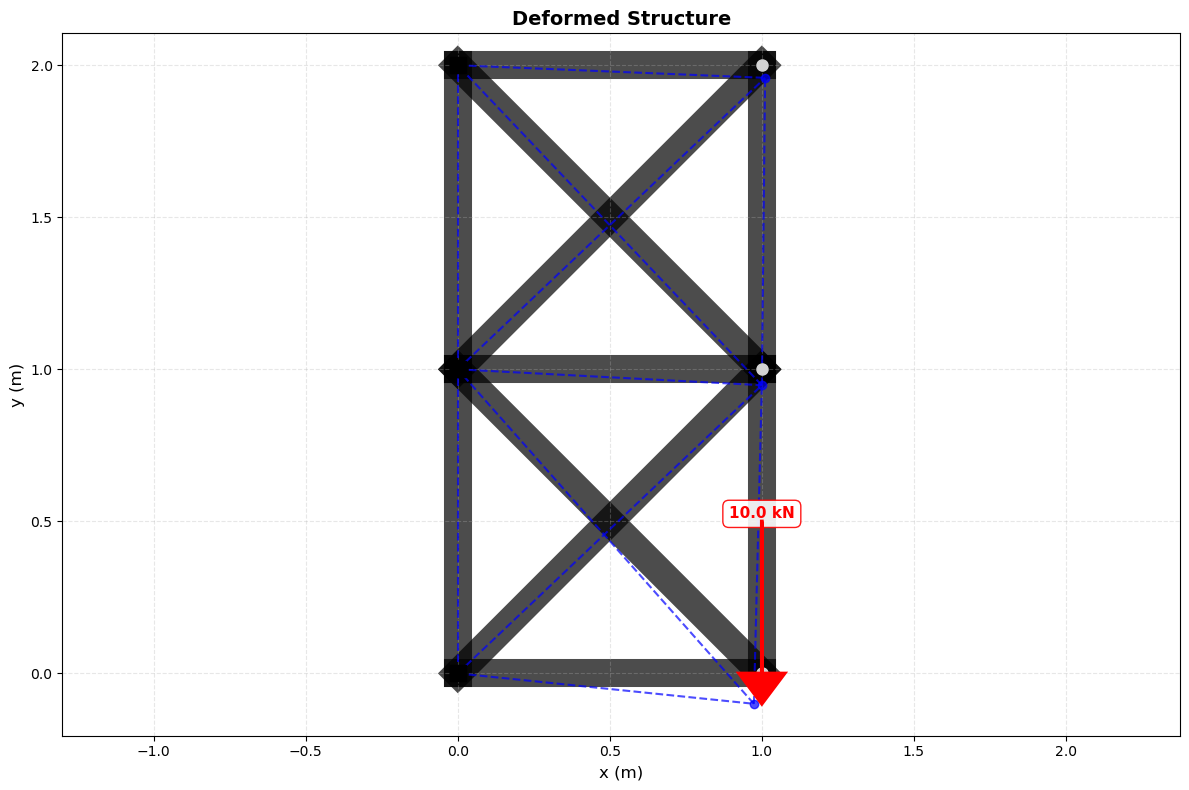

In [3]:
# Solve FEM for full design
d, valid = fem_model.solve()

print(f"Design valid? {valid}")
print(f"Max displacement: {abs(d).max():.3e} m")

# plot deformed truss
fem_model.plot_truss(displacements=d, 
                    title="Deformed Structure")


## Evaluating the metrics

In [4]:
# Design constraints

metrics = fem_model.evaluate_design()
fem_model.print_metrics(metrics)

  Volume: 6.33 m^3
  Max displacement: 1.3536e-04 m
  Max stress: 1.29e-02 Pa
  Compliance: 1.35e-03 J
  Feasible: True


## Optimization truss using 

Starting optimization (Target Volume: 1.5821 m^3)...
Optimization successful.
  Volume: 1.58 m^3
  Max displacement: 2.8443e-04 m
  Max stress: 1.90e-02 Pa
  Compliance: 2.84e-03 J
  Feasible: True


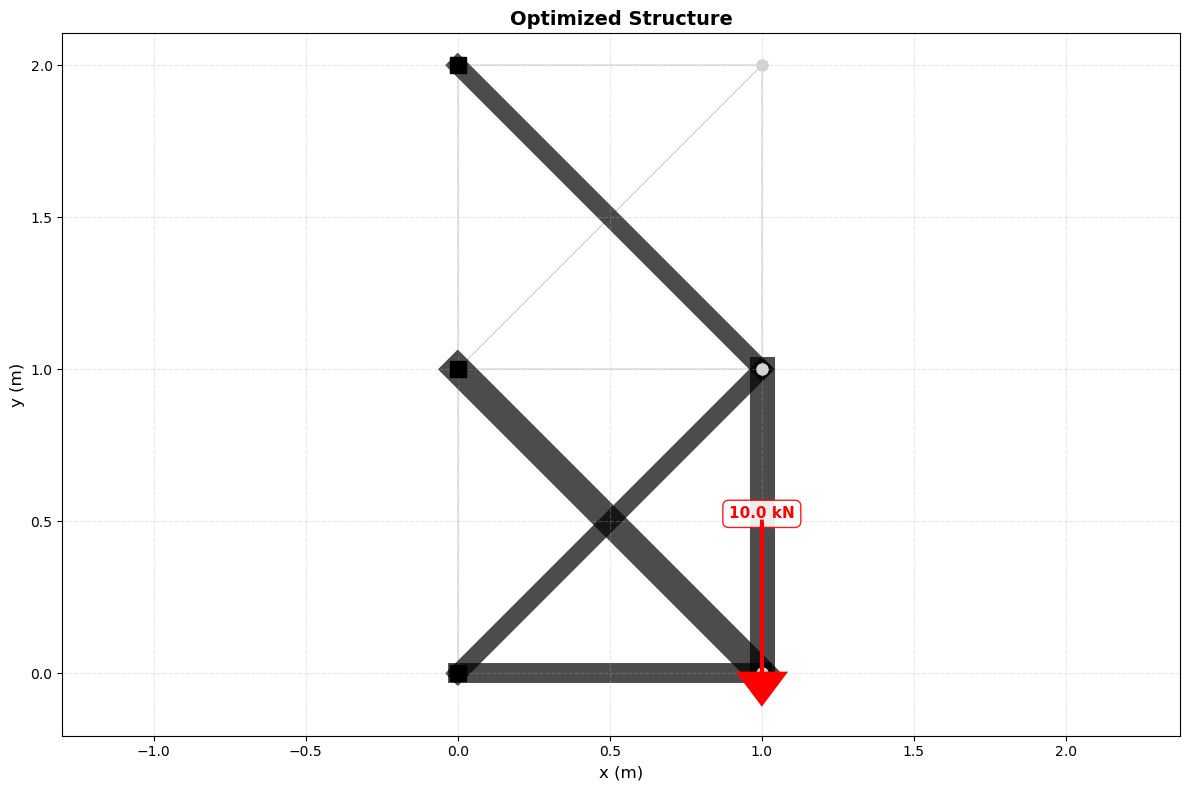

In [5]:
result = fem_model.optimize_areas(volume_fraction = 0.25)

fem_model.A = result.x
metrics = fem_model.evaluate_design()
fem_model.print_metrics(metrics)
fem_model.plot_truss(title="Optimized Structure")

## Plane stress example

<Axes: title={'center': 'Cantilever Problem'}, xlabel='x', ylabel='y'>

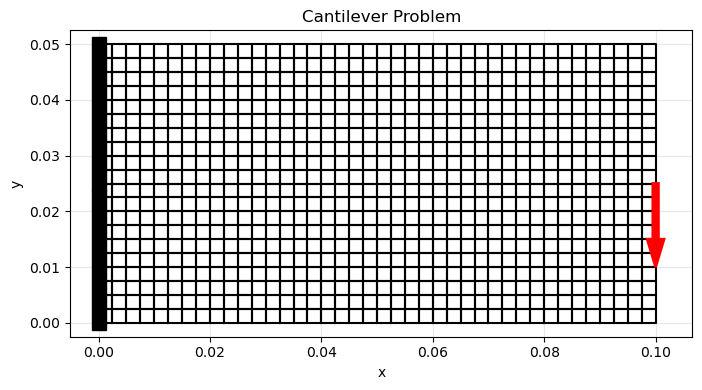

In [6]:

fea2d = PlaneStressCantilever(nx=40, ny=20,)
fea2d.plot_mesh(title="Cantilever Problem")


## Solve Plane stress

  Compliance: 3.9243e-05
  Volume: 5.0000e-03
  Volume fraction: 1.0000
  Feasible: True


<Axes: title={'center': 'Deformed Shape (scale=2.5e+02)'}, xlabel='x', ylabel='y'>

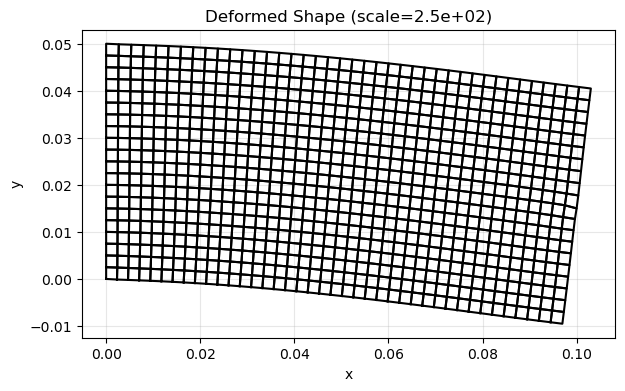

In [7]:

U, valid = fea2d.solve()
metrics = fea2d.evaluate_design()
fea2d.print_metrics(metrics)

fea2d.plot_displacement()

Starting OC Optimization: Target VF=0.5, Filter R=1.5
Iter   0: Compliance=0.0003139, volume_fraction=0.5000, Change=0.2000
Iter   5: Compliance=0.0001059, volume_fraction=0.5000, Change=0.2000
Iter  10: Compliance=8.499e-05, volume_fraction=0.5002, Change=0.1188
Iter  15: Compliance=7.422e-05, volume_fraction=0.5000, Change=0.0823
Iter  20: Compliance=7.013e-05, volume_fraction=0.4999, Change=0.0394
Iter  25: Compliance=6.942e-05, volume_fraction=0.5001, Change=0.0215
Iter  30: Compliance=6.936e-05, volume_fraction=0.5000, Change=0.0175
Iter  35: Compliance=6.932e-05, volume_fraction=0.5000, Change=0.0157
Iter  40: Compliance=6.924e-05, volume_fraction=0.5001, Change=0.0180
Iter  45: Compliance=6.919e-05, volume_fraction=0.5000, Change=0.0167
Iter  50: Compliance=6.912e-05, volume_fraction=0.5000, Change=0.0144
Iter  55: Compliance=6.911e-05, volume_fraction=0.5000, Change=0.0140
Iter  60: Compliance=6.91e-05, volume_fraction=0.5000, Change=0.0124
Iter  65: Compliance=6.907e-05, volum

<Axes: title={'center': 'Optimized Cantilever Structure'}, xlabel='x', ylabel='y'>

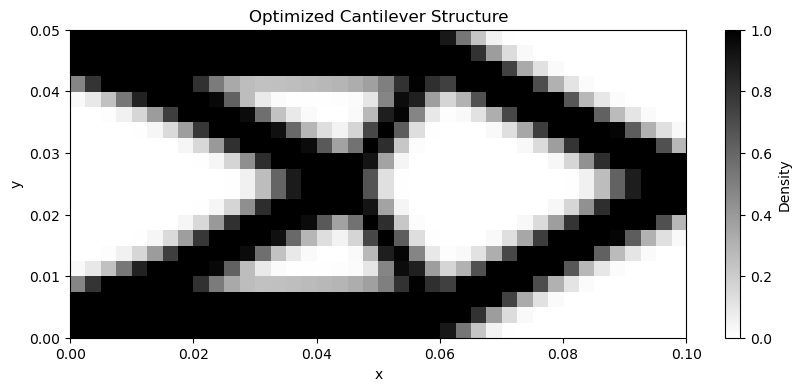

In [8]:
## Optimize 2D structure

toOC = TopOptOC(fea2d, volume_fraction = 0.5)

toOC.optimize()
fea2d.plot_density(title="Optimized Cantilever Structure")